<a href="https://colab.research.google.com/github/JadonTelep/MAT-422/blob/main/SP_24_MAT_422_2_4_Maximum_Likelihood_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 2 - Probability**

## 2.4 Maximum likelihood estimation

### 2.4.1 MLE for random samples

Maximum likelihood estimation (MLE) is an effective approach of estimating the parameters of a probability distribution through maximizing a likelihood function. The point in the parameter space that maximizes the likelihood function is called the maximum likelihood estimate. The logic of maximum likelihood is both intuitive and flexible. As a result, the method has become a dominant means of statistical inference.

**Definition 2.4.1.** Let $X_{1}, X_{2}, \ldots, X_{n}$ have joint pmf or pdf
$$
\begin{equation*}
f\left(x_{1}, x_{2}, \ldots, x_{n} ; \theta_{1}, \ldots, \theta_{m}\right) \tag{2.4.1}
\end{equation*}
$$
where the parameters $\theta_{1}, \ldots, \theta_{m}$ have unknown values. When $x_{1}, \ldots, x_{n}$ are the observed sample values and (2.4.1) is regarded as a function of $\theta_{1}, \ldots, \theta_{m}$, it is called the likelihood function. The maximum likelihood estimates (mle's) $\hat{\theta}_{1}, \ldots, \hat{\theta}_{m}$ are those values of the $\theta_{i}$ 's that maximize the likelihood function, so that
$$
f\left(x_{1}, \ldots, x_{n} ; \hat{\theta}_{1}, \ldots, \hat{\theta}_{m}\right) \geq f\left(x_{1}, \ldots, x_{n} ; \theta_{1}, \ldots, \theta_{m}\right) \text { for all } \theta_{1}, \ldots, \theta_{m}
$$

When the $X_{i}$ 's are substituted in place of the $x_{i}$ 's, the maximum likelihood estimators result.

**Example 2.4.2.** Let $X_{1}, \ldots, X_{n}$ be a random sample from a normal distribution. The likelihood function is
$$
\begin{aligned}
f\left(x_{1}, \ldots, x_{n} ; \mu, \sigma^{2}\right) & =\frac{1}{\sqrt{2 \pi \sigma^{2}}} e^{-\left(x_{1}-\mu\right)^{2} /\left(2 \sigma^{2}\right)} \ldots \cdot \frac{1}{\sqrt{2 \pi \sigma^{2}}} e^{-\left(x_{n}-\mu\right)^{2} /\left(2 \sigma^{2}\right)} \\
& =\left(\frac{1}{2 \pi \sigma^{2}}\right)^{n / 2} e^{-\Sigma\left(x_{i}-\mu\right)^{2} /\left(2 \sigma^{2}\right)}
\end{aligned}
$$

So
$$
\ln \left[f\left(x_{1}, \ldots, x_{n} ; \mu, \sigma^{2}\right)\right]=-\frac{n}{2} \ln \left(2 \pi \sigma^{2}\right)-\frac{1}{2 \sigma^{2}} \sum\left(x_{i}-\mu\right)^{2}
$$

To find the maximizing values of $\mu$ and $\sigma^{2}$, we must take the partial derivatives of $\ln (f)$ with respect to $\mu$ and $\sigma^{2}$, equate them to zero, and solve the resulting two equations. First, taking derivative with respect to $\mu$, we have
$$
\frac{\partial \ln \left[f\left(x_{1}, \ldots, x_{n} ; \mu, \sigma^{2}\right)\right]}{\partial \mu}=-\frac{1}{\sigma^{2}} \sum\left(x_{i}-\mu\right)
$$

Equating the derivative zero and solving for $\mu$ result in the following:
$$
\hat{\mu}=\frac{1}{n} \sum x_{i}
$$

Similarly, taking derivative with respect to $\sigma^{2}$,
$$
\frac{\partial \ln \left[f\left(x_{1}, \ldots, x_{n} ; \mu, \sigma^{2}\right)\right]}{\partial \sigma^{2}}=-\frac{n}{2 \sigma^{2}}+\frac{1}{2 \sigma^{4}} \sum\left(x_{i}-\mu\right)^{2}
$$
and
$$
\sigma^{2}=\frac{\sum\left(x_{i}-\mu\right)^{2}}{n}
$$

Therefore, the resulting mle's are
$$
\hat{\mu}=\bar{X} \quad \hat{\sigma}^{2}=\frac{\sum\left(X_{i}-\bar{X}\right)^{2}}{n}
$$

**EXAMPLE:** Use scipy library to fit data from a normal distrubition using Maximum Likelihood Estimation (MLE)

In [45]:
from scipy.stats import norm
import numpy as np
import random

# Sample data
random.seed(10)
data = np.random.normal(loc=10, scale=2, size=100)

# Fit a normal distribution to the data
mean, std = norm.fit(data)

# Print the fitted parameters
print("mean:", mean)
print("std:", std)

mean: 10.310857217142726
std: 1.935352108922705


See orginal documentation for more details: [scipy.stats.rv_continuous.fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.fit.html#scipy.stats.rv_continuous.fit).

### 2.4.2 Linear regression

Given input data points $\left\{\left(\mathbf{x}_{i}, y_{i}\right)\right\}_{i=1}^{n}$, we seek an affine function to fit the data and each $\mathbf{x}_{i}=\left(x_{i 1}, \ldots, x_{i p}\right)$. The common approach involves finding coefficients $\beta_{j}, j=1 \ldots, p$ 's that minimize the criterion
$$
\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}
$$
where
$$
\hat{y}_{i}=\beta_{0}+\beta_{1} x_{i 1}+\ldots+\beta_{p} x_{i p}
$$

Now we wish to discuss it from a probabilistic point of view by the maximum likelihood estimation. Consider that we have $n$ points, each of which is drawn in an independent and identically distributed (i.i.d.) way from the normal distribution. For a given, $\mu, \sigma^{2}$, the probability of those $n$ points being drawn define the likelihood function, which are just the multiplication of $n$ normal probability density functions (pdf) (because they are independent):
$$
\begin{equation*}
\mathscr{P}(\mu \mid y)=\prod_{i=1}^{n} P_{Y}\left(y_{i} \mid \mu, \sigma^{2}\right)=\prod_{i=1}^{n} \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{\left(y_{i}-\mu\right)^{2}}{2 \sigma^{2}}} \tag{2.4.2}
\end{equation*}
$$

Now understand that $y$ is a random variable,
$$
y_{i}=\hat{y}_{i}+\varepsilon
$$
where $\varepsilon \sim N\left(0, \sigma^{2}\right)$. Thus $y_{i}$ is a normal variable with mean as a linear function of $\mathbf{x}$ and a fixed standard deviation:
$$
\begin{equation*}
y_{i} \sim N\left(\hat{y}_{i}, \sigma^{2}\right) . \tag{2.4.3}
\end{equation*}
$$

As a result, for each $y_{i}$, we choose $\mu$ in the normal distributions in (2.4.2) as
$$
\mu_{i}=\hat{y}_{i}
$$

Hence we derive the maximum likelihood estimate
$$
\begin{align*}
\hat{\beta}=\arg \max \mathscr{P}(\beta \mid y) & =\arg \max _{\beta} \prod_{i=1}^{n} \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{\left(y_{i}-\hat{\gamma}_{i}\right)^{2}}{2 \sigma^{2}}} \\
& =\arg \max _{\beta} \log \left(\prod_{i=1}^{n} \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{\left(y_{i}-\hat{\gamma}_{i}\right)^{2}}{2 \sigma^{2}}}\right) \\
& =\arg \max _{\beta} \sum_{i=1}^{n} \log \left(\frac{1}{\sigma \sqrt{2 \pi}}\right)+\log \left(e^{-\frac{\left(y_{i}-\hat{\gamma}_{i}\right)^{2}}{2 \sigma^{2}}}\right) \\
& =\arg \max _{\beta} \sum_{i=1}^{n} \log \left(e^{-\frac{\left(y_{i}-\hat{y}_{i}\right)^{2}}{2 \sigma^{2}}}\right)  \tag{2.4.4}\\
& =\arg \max _{\beta} \sum_{i=1}^{n}-\frac{\left(y_{i}-\hat{y}_{i}\right)^{2}}{2 \sigma^{2}} \\
& =\arg \min _{\beta} \sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}
\end{align*}
$$
which is exactly the least square problem we discussed before.

**EXAMPLE:** Use sklearn library to use linear regression to find linear model of some function. In this example, start with $y = 3 + 1x_1 + 2x_2$. Then add some noise using *np.random.normal()*. It is good practice that we use a normal distribution as one of the assumptions for this model is that the residuals of y will be normal. For $\hat{y} = \hat{\beta_{0}} + \hat{\beta_{1}}x_1 + \hat{\beta_{2}}x_2$

$$r^2 = reg.score(X, y)$$

$$\hat{\beta_{0}} = \text{ reg.intercept_ }$$

$$\hat{\beta_{1,2}} = \text{ reg.coef_ }$$

Score:  0.9642714665149346
Coefficients: [2.53394047 1.27691733]
Intercept: 2.591484543393803


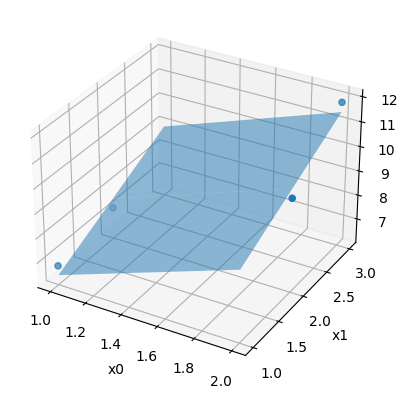

In [29]:
import numpy as np
import random
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# y = 1 * x0 + 2 * x1 + 3
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(X, np.array([1, 2])) + 3

# Add the noise to y
random.seed(10)
y = y + np.random.normal(0, 1, size=len(y))

# Create a model and fit it
reg = LinearRegression().fit(X, y)

# Print the results
print("Score: ", reg.score(X, y))
print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)

# Create the regression line
x0, x1 = np.meshgrid(range(1, 3), range(1, 4))
y_pred = reg.intercept_ + reg.coef_[0] * x0 + reg.coef_[1] * x1

# Create the figure and axes object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.scatter(X[:,0], X[:,1], y)
ax.plot_surface(x0, x1, y_pred, alpha=0.5)

# Set labels
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('y')

# Show the plot
plt.show()

Code referenced from orginal documentation: [LinearRegression](https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.LinearRegression.html).

## Code References

scikit-learn developers (2007-2024) "LinearRegression" LinearRegression — scikit-learn 1.6.dev0 documentation, https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.LinearRegression.html. Accessed 6 Oct. 2024.